In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

In [2]:
from scipy.stats import ttest_ind

In [3]:
def load(path):
    f = open(path, 'rb')
    liste = pickle.load(f)
    f.close()
    return liste

### Plot training

In [4]:
path = "output/pusher/TAMER/Train"

seeds = [0, 1, 5]

reward_trial = []

for i in range(len(seeds)):
    log_path = os.path.join(path, str(seeds[i]))
    data = pd.read_csv(log_path+f"/{str(seeds[i])}.csv")
    steps_tamer = np.array(data["Step"])
    episode_reward = np.array(data["Value"])
    reward_trial.append(episode_reward)

tamer = np.array(reward_trial)
tamer_mean = np.mean(tamer , axis=0)
tamer_std = np.std(tamer, axis=0)

In [5]:
path = "output/pusher/INFORM/Train"

seeds = [0, 1, 5]
reward_trial = []

for i in range(len(seeds)):
    log_path = os.path.join(path, str(seeds[i]))
    data = pd.read_csv(log_path+f"/{str(seeds[i])}.csv")
    steps_inform = np.array(data["Step"])
    episode_reward = np.array(data["Value"])
    reward_trial.append(episode_reward)

inform = np.array(reward_trial)
inform_mean = np.mean(inform , axis=0)
inform_std = np.std(inform, axis=0)

In [6]:
expert = np.full(steps_inform.shape[0],-30)

/tmp/ipykernel_8288/4209510320.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3],     # The line objects


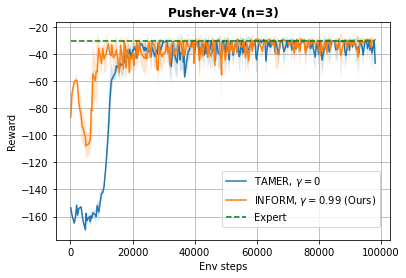

In [9]:
fig, ax = plt.subplots(1)

#y = np.arange(grid_offline_mean.shape[0])

l1 = ax.plot(steps_tamer[:500:2], tamer_mean[:500:2], label='TAMER')
l2 = ax.plot(steps_inform[:500:2], inform_mean[:500:2], label='INFORM')
l3 = ax.plot(steps_inform[:500:2], expert[:500:2], color ='g', linestyle='dashed', label='Expert')

ax.fill_between(steps_tamer[:500:2], tamer_mean[:500:2]+tamer_std[:500:2], tamer_mean[:500:2]-tamer_std[:500:2], alpha=0.2)
ax.fill_between(steps_inform[:500:2], inform_mean[:500:2]+ inform_std[:500:2], inform_mean[:500:2]- inform_std[:500:2], alpha=0.2)

labels = ["TAMER, $\gamma = 0$", "INFORM, $\gamma = 0.99$ (Ours)", "Expert"]

fig.legend([l1, l2, l3],     # The line objects
           labels=labels,   # The labels for each line
           #loc="center right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           ncol=1, # Title for the legend
           fancybox=True,
           bbox_to_anchor=(0.9, 0.4),
           bbox_transform=fig.transFigure
           )

#ax.legend(loc='upper right')
ax.set_xlabel('Env steps')
ax.set_ylabel('Reward')
ax.set_title("Pusher-V4 (n=3)", fontweight="bold")
ax.grid()
fig.savefig("pusher.pdf",bbox_inches='tight')

### Evaluation with obstacle

##### Original

In [4]:
success_tamer_original = np.array(load("output/pusher/TAMER/Test_original/success")).flatten()
success_inform_original = np.array(load("output/pusher/INFORM/Test_original/success")).flatten()

In [5]:
success_tamer_original = np.array(load("output/pusher/TAMER/Test_original/distance")).flatten()
success_inform_original = np.array(load("output/pusher/INFORM/Test_original/distance")).flatten()

In [6]:
t_statistic, p_value = ttest_ind(success_tamer_original, success_inform_original)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")


T-statistic: -3.6113640158482303, P-value: 0.0003301653937702639


In [7]:
success_tamer_original = np.array(load("output/pusher/TAMER/Test_original/success")).flatten()
success_inform_original = np.array(load("output/pusher/INFORM/Test_original/success")).flatten()

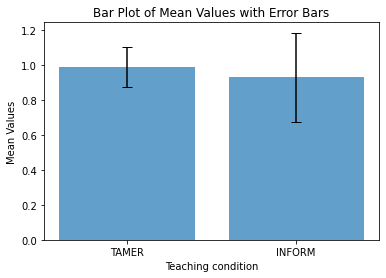

In [8]:
means = [success_tamer_original.mean(), success_inform_original.mean()]
stds = [success_tamer_original.std(), success_inform_original.std()]

fig, ax = plt.subplots()

x_pos = np.arange(2)

ax.bar(x_pos, means, yerr=stds, capsize=5, align='center', alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(["TAMER", "INFORM"])
ax.set_xlabel('Teaching condition')
ax.set_ylabel('Mean Values')
ax.set_title('Bar Plot of Mean Values with Error Bars')

plt.show()


###### Perturbed

In [9]:
success_tamer_perturbed = np.array(load("output/pusher/TAMER/Test/success")).flatten()
success_inform_perturbed = np.array(load("output/pusher/INFORM/Test/success")).flatten()

In [10]:
success_tamer_perturbed = np.array(load("output/pusher/TAMER/Test/distance")).flatten()
success_inform_perturbed = np.array(load("output/pusher/INFORM/Test/distance")).flatten()

In [11]:
t_statistic, p_value = ttest_ind(success_tamer_perturbed, success_inform_perturbed)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")


T-statistic: 7.984037259389494, P-value: 7.280476174400373e-15


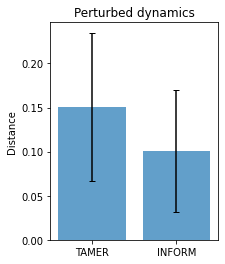

In [12]:
means = [success_tamer_perturbed.mean(), success_inform_perturbed.mean()]
stds = [success_tamer_perturbed.std(), success_inform_perturbed.std()]

fig, ax = plt.subplots(figsize=(3, 4))

x_pos = np.arange(2)

ax.bar(x_pos, means, yerr=stds, capsize=3, align='center', alpha=0.7)
ax.set_xticks(x_pos)
ax.set_xticklabels(["TAMER", "INFORM"])
ax.set_ylabel('Distance')
ax.set_title('Perturbed dynamics')
plt.show()
fig.savefig("distance_perturbed.pdf",bbox_inches='tight')

In [13]:
success_tamer.mean()

NameError: name 'success_tamer' is not defined

In [293]:
success_inform.mean()

0.6433333333333333

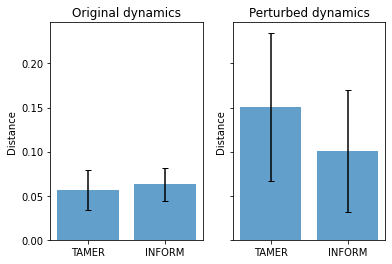

In [12]:
means_original = [success_tamer_original.mean(), success_inform_original.mean()]
stds_original = [success_tamer_original.std(), success_inform_original.std()]

means_perturbed = [success_tamer_perturbed.mean(), success_inform_perturbed.mean()]
stds_perturbed = [success_tamer_perturbed.std(), success_inform_perturbed.std()]


fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(6, 4))  # 1 row, 2 columns for two side-by-side plots

x_pos = np.arange(2)

axs[0].bar(x_pos, means_original, yerr=stds_original, capsize=3, align='center', alpha=0.7)
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(["TAMER", "INFORM"])
axs[0].set_ylabel('Distance')
axs[0].set_title('Original dynamics')


axs[1].bar(x_pos, means_perturbed, yerr=stds_perturbed, capsize=3, align='center', alpha=0.7)
axs[1].set_xticks(x_pos)
axs[1].set_xticklabels(["TAMER", "INFORM"])
axs[1].set_ylabel('Distance')
axs[1].set_title('Perturbed dynamics')



fig.savefig("pusher_success.pdf",bbox_inches='tight')

In [14]:
means_perturbed = [success_tamer_perturbed.mean(), success_inform_perturbed.mean()]
means_perturbed

[0.15101975760385353, 0.10081876606479537]

In [15]:
stds_perturbed = [success_tamer_perturbed.std(), success_inform_perturbed.std()]
stds_perturbed

[0.083859668664128, 0.06919869492118987]

#### Plot trajectories

###### Original

In [16]:
x_tamer_original = np.array(load("output/pusher/TAMER/Test_original/x_cord"))
y_tamer_original = np.array(load("output/pusher/TAMER/Test_original/y_cord"))

In [17]:
x_inform_original = np.array(load("output/pusher/INFORM/Test_original/x_cord"))
y_inform_original = np.array(load("output/pusher/INFORM/Test_original/y_cord"))

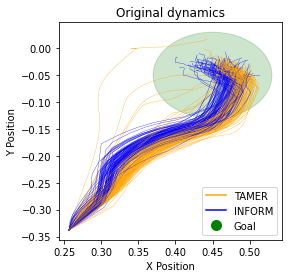

In [297]:
x_tamer_run = x_tamer_original[1]
y_tamer_run = y_tamer_original[1]
x_inform_run = x_inform_original[1]
y_inform_run = y_inform_original[1]

x_goal = 0.45
y_goal = -0.05

fig, ax = plt.subplots(figsize=(4, 4)) 
for i in range(100):
# Plot the trajectories
    ax.plot(x_tamer_original[1][i], y_tamer_original[1][i], linewidth=0.3, color='orange' )
    ax.plot(x_inform_original[1][i],y_inform_original[1][i], linewidth=0.3, color='blue')

tamer_legend, = ax.plot([], [], color='orange', label='TAMER')
inform_legend, = ax.plot([], [], color='blue', label='INFORM')

# Plot the goal position as a red point
#ax.plot(x_goal, y_goal, label='Goal Position', color='red', marker='o', markersize=10)
circle = Circle((x_goal, y_goal), 0.08, color='green', fill=True, alpha=0.2)  # Adjust color and alpha as needed
plt.gca().add_patch(circle)
goal_legend = ax.plot([], [], color='green', marker='o', linestyle='None', label='Goal', markersize=10)


# Adding labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Original dynamics')
ax.legend()

# Show the plot
plt.show()

##### Obstacle

In [18]:
x_tamer_perturbed = np.array(load("output/pusher/TAMER/Test/x_cord"))
y_tamer_perturbed = np.array(load("output/pusher/TAMER/Test/y_cord"))

In [19]:
x_inform_perturbed = np.array(load("output/pusher/INFORM/Test/x_cord"))
y_inform_perturbed = np.array(load("output/pusher/INFORM/Test/y_cord"))

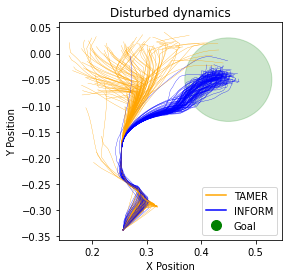

In [301]:


x_goal = 0.45
y_goal = -0.05

fig, ax = plt.subplots(figsize=(4, 4)) 
for i in range(100):
# Plot the trajectories
    ax.plot(x_tamer_perturbed[1][i], y_tamer_perturbed[1][i], linewidth=0.3, color='orange' )
    ax.plot(x_inform_perturbed[1][i], y_inform_perturbed[1][i], linewidth=0.3, color='blue')

tamer_legend, = ax.plot([], [], color='orange', label='TAMER')
inform_legend, = ax.plot([], [], color='blue', label='INFORM')

# Plot the goal position as a red point
#ax.plot(x_goal, y_goal, label='Goal Position', color='red', marker='o', markersize=10)
circle = Circle((x_goal, y_goal), 0.08, color='green', fill=True, alpha=0.2)  # Adjust color and alpha as needed
plt.gca().add_patch(circle)
goal_legend = ax.plot([], [], color='green', marker='o', linestyle='None', label='Goal', markersize=10)


# Adding labels and title
ax.set_xlabel('X Position') 
ax.set_ylabel('Y Position')
ax.set_title('Disturbed dynamics')
ax.legend()

# Show the plot
plt.show()

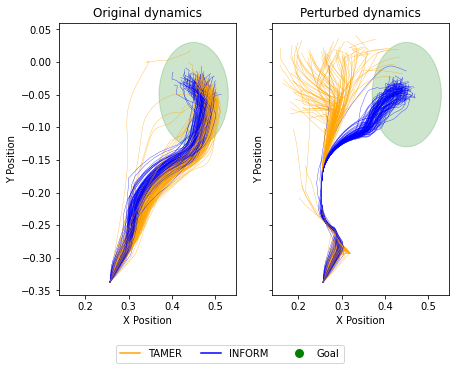

In [22]:

x_goal = 0.45
y_goal = -0.05

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(7, 5))  # 1 row, 2 columns for two side-by-side plots

# Plot for the first environment
for i in range(100):
    axs[0].plot(x_tamer_original[1][i], y_tamer_original[1][i], linewidth=0.3, color='orange' )
    axs[0].plot(x_inform_original[1][i],y_inform_original[1][i], linewidth=0.3, color='blue')

circle = Circle((x_goal, y_goal), 0.08, color='green', fill=True, alpha=0.2)  # Adjust color and alpha as needed
axs[0].add_patch(circle)

axs[0].set_xlabel('X Position')
axs[0].set_ylabel('Y Position')
axs[0].set_title('Original dynamics')

for i in range(100):
    axs[1].plot(x_tamer_perturbed[1][i], y_tamer_perturbed[1][i], linewidth=0.3, color='orange' )
    axs[1].plot(x_inform_perturbed[1][i], y_inform_perturbed[1][i], linewidth=0.3, color='blue')

circle = Circle((x_goal, y_goal), 0.08, color='green', fill=True, alpha=0.2)  # Adjust color and alpha as needed
axs[1].add_patch(circle)

axs[1].set_xlabel('X Position')
axs[1].set_ylabel('Y Position')
axs[1].set_title('Perturbed dynamics')

orange_line = Line2D([0], [0], label='TAMER', color='orange')
blue_line = Line2D([0], [0], label='INFORM', color='blue')
green_circle = Line2D([0], [0], marker='o', color='white', label='Goal', markerfacecolor='green', markersize=10)

fig.legend(handles=[orange_line, blue_line, green_circle],
           ncol=3,
           fancybox=True,
           bbox_to_anchor=(0.7, 0),
           bbox_transform=fig.transFigure
          )
fig.savefig("pusher_trajectories.pdf",bbox_inches='tight')